<a href="https://colab.research.google.com/github/sejallotliker/MLnow_2.0/blob/main/ML_EDA_Students_performance_in_exam_univariate_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine learning

Exploratory data analysis

Author: `Sejal Lotliker`

Date: `07-06-21`

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

In [10]:
path='/content/drive/MyDrive/Machine learning course by Girlscript/ML_EDA_Students performance in exam/StudentsPerformance.csv'
my_data=my_data=pd.read_csv(path)

In [11]:
my_data.head(10)

,gender,groups,parentsEducation,lunch,test_preparation_course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [12]:
ls

drive/  sample_data/


#**Data** **Processing**

In [13]:
print(f'gender:{my_data.gender.unique()}')
print(f'groups:{my_data.groups.unique()}')
print(f'parentsEducation:{my_data.parentsEducation.unique()}')
print(f'lunch:{my_data.lunch.unique()}')
print(f'test_preparation_course:{my_data.test_preparation_course.unique()}')

gender:['female' 'male']
groups:['group B' 'group C' 'group A' 'group D' 'group E']
parentsEducation:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch:['standard' 'free/reduced']
test_preparation_course:['none' 'completed']


#Converting categorical data to numeric

Replacing female=1, male=2

In [14]:
my_data['gender']=my_data['gender'].apply({'female':1, 'male':2}.get)
my_data['groups']=my_data['groups'].apply({'group B':1, 'group C':2, 'group A':3, 'group D':4, 'group E':5}.get)
my_data['parentsEducation']=my_data['parentsEducation'].apply({"bachelor's degree":1, 'some college':2, "master's degree":3 ,"associate's degree":4,
 'high school':5, 'some high school':6}.get)
my_data['lunch']=my_data['lunch'].apply({'standard':1, 'free/reduced':2}.get)
my_data['test_preparation_course']=my_data['test_preparation_course'].apply({'none':0, 'completed':1}.get)


In [15]:
my_data.head()

,gender,groups,parentsEducation,lunch,test_preparation_course,math score,reading score,writing score
0,1,1,1,1,0,72,72,74
1,1,2,2,1,1,69,90,88
2,1,1,3,1,0,90,95,93
3,2,3,4,2,0,47,57,44
4,2,2,2,1,0,76,78,75


#Data visualisation

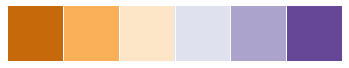

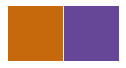

In [16]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purpole to orange colors
pal=sns.color_palette('PuOr',6) #To print 6 shades from purple to orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors=['#c6690c','#664697'] #orange purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [17]:
print(f'''There are {len(my_data.columns)} columns in the data frame namely,
{my_data.columns}''')

There are 8 columns in the data frame namely,
Index(['gender', 'groups', 'parentsEducation', 'lunch',
       'test_preparation_course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


Pairplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

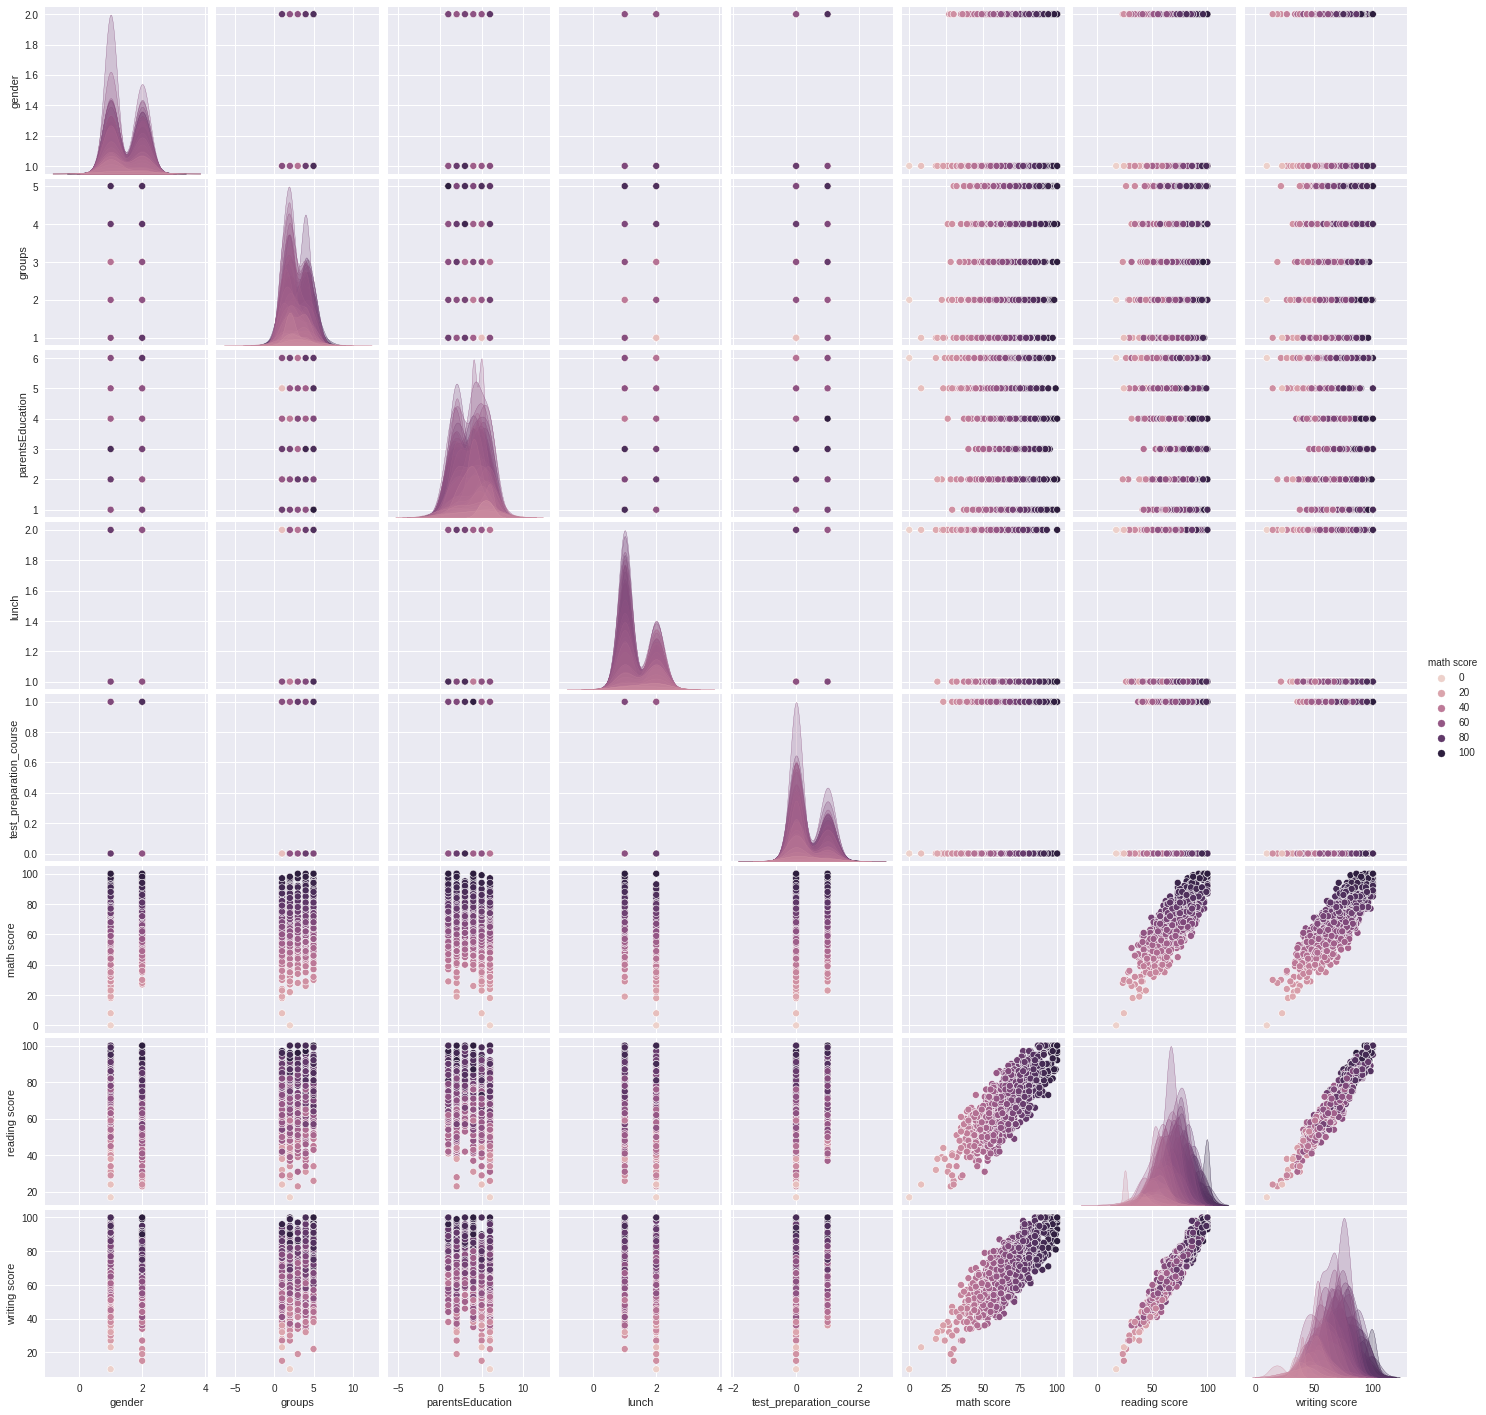

In [18]:
sns.pairplot(my_data,
             x_vars = ['gender', 'groups', 'parentsEducation', 'lunch',
       'test_preparation_course', 'math score', 'reading score',
       'writing score'],
             y_vars = ['gender', 'groups', 'parentsEducation', 'lunch',
       'test_preparation_course', 'math score', 'reading score',
       'writing score'],
             diag_kind='kde', hue='math score'
             )

Strip plot

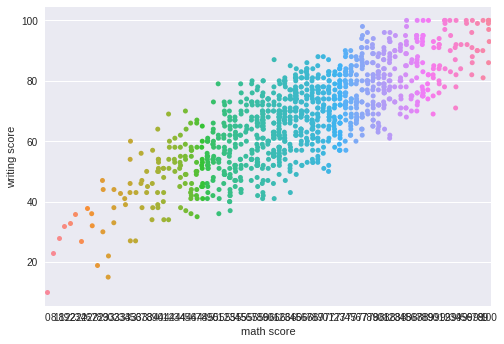

In [19]:
sns.stripplot(y='writing score', x='math score', data= my_data)

Plotting multiple graphs together

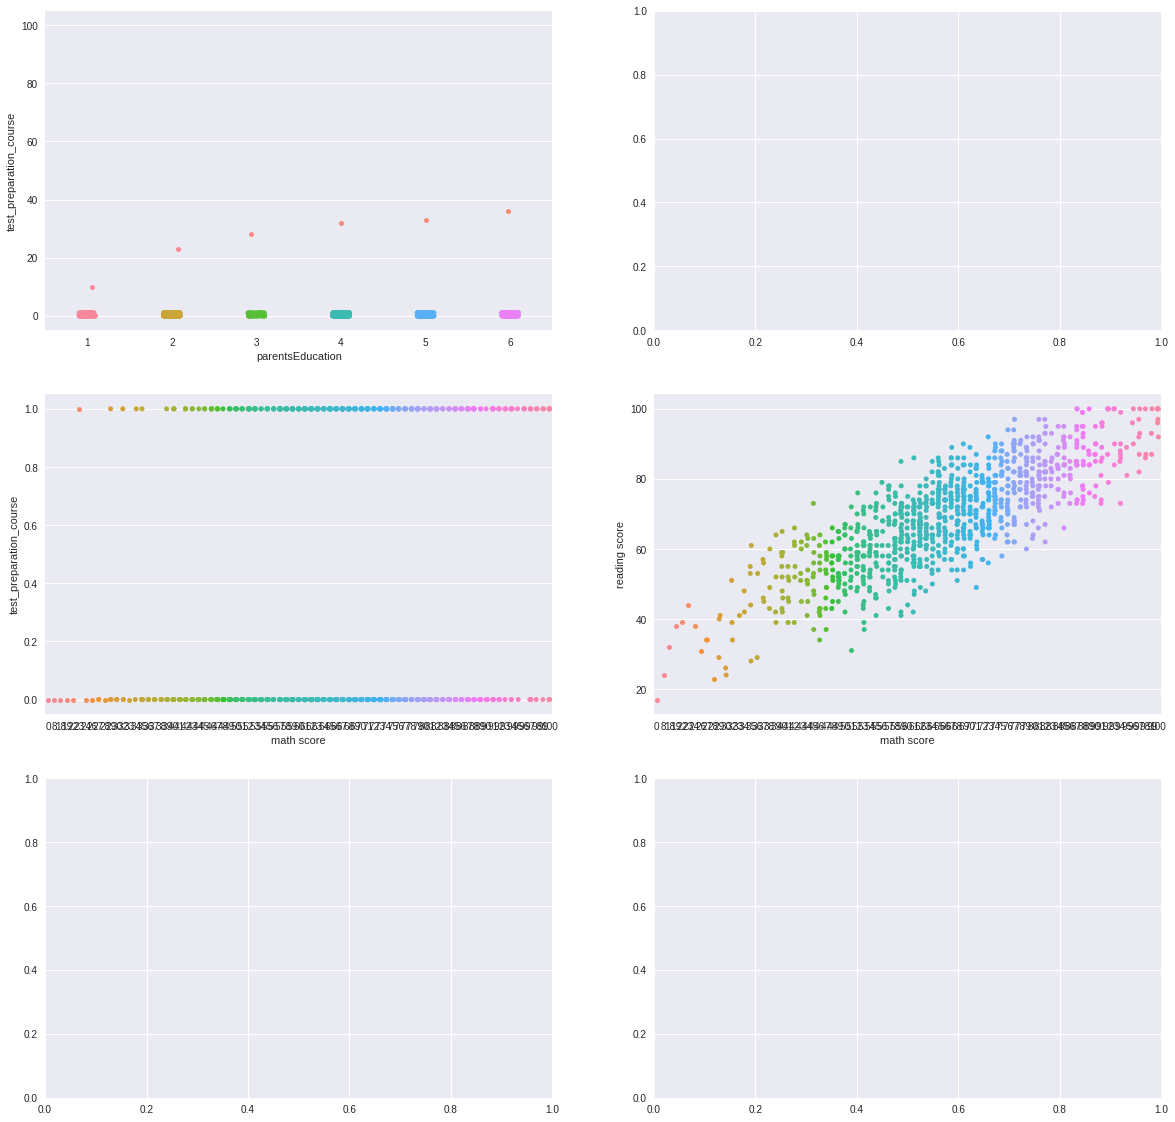

In [23]:
fig, axarr = plt.subplots(3,2, figsize=(20,20))
# 3 rows and 2 columns all starting from (0,0)

sns.stripplot(y='writing score', x='math score', data= my_data, hue=None, ax=axarr[0][0])
sns.stripplot(y='reading score', x='math score', data= my_data, hue=None, ax=axarr[1][1])
sns.stripplot(y='test_preparation_course', x='math score', data= my_data, hue=None, ax=axarr[1][0])
sns.stripplot(y='test_preparation_course', x='parentsEducation', data= my_data, hue=None, ax=axarr[0][0])

#Data Splits

In [26]:
# 80-20 train-test percent split
trainDataset= my_data.sample(frac=0.8, random_state=0)
testDataset= my_data.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     gender  groups  parentsEducation  ...  math score  reading score  writing score
993       1       4                 1  ...          62             72             74
859       2       2                 4  ...          87             73             72
298       2       2                 5  ...          40             46             50
553       2       4                 2  ...          77             62             64
672       1       2                 2  ...          69             78             76

[5 rows x 8 columns]
    gender  groups  parentsEducation  ...  math score  reading score  writing score
9        1       1                 5  ...          38             60             50
11       2       4                 4  ...          40             52             43
19       1       2                 4  ...          54             58             61
23       1       2                 6  ...          69             73             73
28       2       2                 5  ...       

In [27]:
print(trainDataset.shape)
print(testDataset.shape)

(800, 8)
(200, 8)


In [28]:
#copy the trainDataset dataframe for getting the features
trainFeatures= trainDataset.copy()
testFeatures= testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     gender  groups  parentsEducation  ...  math score  reading score  writing score
993       1       4                 1  ...          62             72             74
859       2       2                 4  ...          87             73             72
298       2       2                 5  ...          40             46             50
553       2       4                 2  ...          77             62             64
672       1       2                 2  ...          69             78             76

[5 rows x 8 columns]
    gender  groups  parentsEducation  ...  math score  reading score  writing score
9        1       1                 5  ...          38             60             50
11       2       4                 4  ...          40             52             43
19       1       2                 4  ...          54             58             61
23       1       2                 6  ...          69             73             73
28       2       2                 5  ...       

In [29]:
#To remove the gender column and saving it into the labels variables

trainLabels = trainFeatures.pop('gender')
testLabels = testFeatures.pop('gender')

print(trainLabels.head())
print(testLabels.head())

993    1
859    2
298    2
553    2
672    1
Name: gender, dtype: int64
9     1
11    2
19    1
23    1
28    2
Name: gender, dtype: int64


In [30]:
print(trainFeatures.head())
print(testFeatures.head())

     groups  parentsEducation  lunch  ...  math score  reading score  writing score
993       4                 1      2  ...          62             72             74
859       2                 4      2  ...          87             73             72
298       2                 5      2  ...          40             46             50
553       4                 2      2  ...          77             62             64
672       2                 2      1  ...          69             78             76

[5 rows x 7 columns]
    groups  parentsEducation  lunch  ...  math score  reading score  writing score
9        1                 5      2  ...          38             60             50
11       4                 4      1  ...          40             52             43
19       2                 4      2  ...          54             58             61
23       2                 6      1  ...          69             73             73
28       2                 5      1  ...          70       

In [33]:
print(testFeatures.shape)
print(trainFeatures.shape)

(200, 7)
(800, 7)


#Univariate Linear regression

We are going to consider the `mathscore` and `reading score` for univariate linear regression



In [34]:
unimy_data=my_data[['math score','reading score']]
unimy_data.head()

,math score,reading score
0,72,72
1,69,90
2,90,95
3,47,57
4,76,78


In [37]:
unimy_data.to_csv('univariate_my_data.csv')

In [39]:
ls

drive/  sample_data/  univariate_my_data.csv


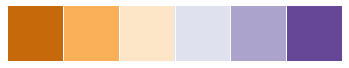

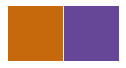

In [40]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purpole to orange colors
pal=sns.color_palette('PuOr',6) #To print 6 shades from purple to orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors=['#c6690c','#664697'] #orange purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [41]:
unimy_data.columns

Index(['math score', 'reading score'], dtype='object')

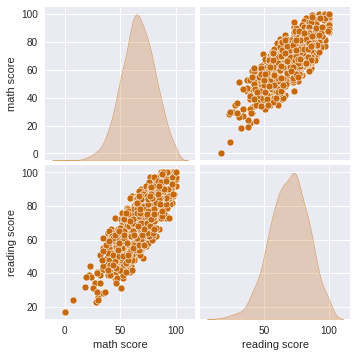

In [42]:
#pairplot for all the values
sns.pairplot(unimy_data,
             x_vars = ['math score', 'reading score'],
             y_vars = ['math score', 'reading score'],
             diag_kind='kde' 
             )

#Data Splits

Data splitting is done for univariate my_data

In [43]:
# 80-20 train-test percent split
trainDataset= unimy_data.sample(frac=0.8, random_state=0)
testDataset= unimy_data.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     math score  reading score
993          62             72
859          87             73
298          40             46
553          77             62
672          69             78
    math score  reading score
9           38             60
11          40             52
19          54             58
23          69             73
28          70             70


In [44]:
print(trainDataset.shape)
print(testDataset.shape)

(800, 2)
(200, 2)


In [45]:
#copy the trainDataset dataframe for getting the features
trainFeatures= trainDataset.copy()
testFeatures= testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     math score  reading score
993          62             72
859          87             73
298          40             46
553          77             62
672          69             78
    math score  reading score
9           38             60
11          40             52
19          54             58
23          69             73
28          70             70
